### Project # 2

### Project#2 Proposal

-Describe how the data source was discovered:
  For this project, I google a dataset.

Title:
Annual Recorded Offences for the latest Fiscal Years (ANZSOC) 

webpage:
http://nzdotstat.stats.govt.nz/wbos/Index.aspx?_ga=2.98448479.1378805044.1584989607-1790723232.1584989607

-Data is free to download?  Yes

-Data is legal to access?   Yes

-Public: This dataset is intended for public access and use.

-Documented Exploratory Data Analysis is not available for the data:
 
  I didn’t find any data analysis of this data set. 

-Project proposal include size of data (rows, columns, megabytes): Yes


-Project proposal relevant to Data 601 objectives:

   Yes, the project proposal is relevant for Data 601. With this data set, I will be doing characterization, I will be able to transform data into useful information, create visualization by producing graphs to show the trend of crimes through the years in New Zeeland.

-Does student understand the stories in the data?
 
 The data is about crimes records in New Zeeland

-Data size: 1,171 KB

-Questions to be investigated

Hypothesis#1:
Theft and related offenses are around 30% of the total offenses.

Hypothesis#2:
A decrease of about 1% of the total offenses in the last years.

### References:
-Class' notes.

-Class' Assigments.

-#https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python


### Questions to be investigated.
#### Hypothesis#1: Theft and related offenses are around 30% of the total offenses.

YES, This hypothesis comes out true, as Theft and related offenses were all around 30% of the total offense.

#### Hypothesis#2: A decrease of about 1% of the total offenses in the last years.

NO, This hypothesis was not wholly verified; it's true that we have a decrease in the total number of offenses through the last years
(I chose to work on the five last years). But the reductions were higher than the 1% hypothesized at the beginning.

In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy as np
import pandas as pd
import csv
import time
import datetime
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

pandas 0.24.2


In [2]:
start_time = time.time()

df = pandas.read_csv('TABLECODE7401_Data_Project_2.csv') # read the file
print('Elapsed time:', round(time.time() - start_time, 2), 'seconds')

df.shape

Elapsed time: 0.06 seconds


(8320, 12)

In [3]:
df.sample(5)

,LOCATION,Location,OFFENCE,Offence,SCENE,Scene,YEAR,Year,MEASURE,Measure,Value,Flags
3681,DC,Bay Of Plenty District,08,Theft and related offences,Z,Total Scene,1996,YE 30 June 1996,RESOLVED,Resolved,3380,NaN
8053,ZZ,Total New Zealand,02,Acts intended to cause injury,Z,Total Scene,2008,YE 30 June 2008,RESOLVED,Resolved,34817,NaN
4283,DE,Eastern District,05,"Abduction, harassment and other related offenc...",Z,Total Scene,2001,YE 30 June 2001,RESOLVED,Resolved,351,NaN
1225,CX,Waitemata District,16,Miscellaneous offences,Z,Total Scene,2011,YE 30 June 2011,RESOLVED,Resolved,62,NaN
4824,DG,Central District,15,"Offences against justice procedures, governmen...",Z,Total Scene,2013,YE 30 June 2013,RECORDED,Recorded,1022,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 12 columns):
LOCATION    8320 non-null object
Location    8320 non-null object
OFFENCE     8320 non-null object
Offence     8320 non-null object
SCENE       8320 non-null object
Scene       8320 non-null object
YEAR        8320 non-null int64
Year        8320 non-null object
MEASURE     8320 non-null object
Measure     8320 non-null object
Value       8320 non-null int64
Flags       0 non-null float64
dtypes: float64(1), int64(2), object(9)
memory usage: 780.1+ KB


### Cleaning and tidying data.

#### written documentation on what cleaning was performed:
I had some duplicate columns, I dropped one of each.
I had one column with multiple data in a row, I splitted them.
I had one column with two rows' name, I use pivot to create two new columns from that.

#### written analysis of cleaned data for characteristics:
after cleaning and tidying my data, the number of rows passed from 8320 to 4160.

In [5]:
print(df['Year'][0])

YE 30 June 2011


In [6]:
# This column('Year') contains multiple data.

print('abbr:',str(df['Year'][0])[0:2])
print('day:',str(df['Year'][0])[3:6])
print('month:',str(df['Year'][0])[6:10])
print('year:',str(df['Year'][0])[11:15])

abbr: YE
day: 30 
month: June
year: 2011


In [7]:
# As I already have another column 'YEAR', I will extract "day" and "month" from the column('year') and create a new column called "Month"

def extract_day_month(row):                           
      date_time_str = str(row['Year'])
    
      return date_time_str[3:10]                

df['Month'] = df.apply(extract_day_month, axis=1)

In [8]:
df.head()

,LOCATION,Location,OFFENCE,Offence,SCENE,Scene,YEAR,Year,MEASURE,Measure,Value,Flags,Month
0,BG,Northland District,01,Homicide and related offences,Z,Total Scene,2011,YE 30 June 2011,RECORDED,Recorded,2,NaN,30 June
1,BG,Northland District,01,Homicide and related offences,Z,Total Scene,2012,YE 30 June 2012,RECORDED,Recorded,2,NaN,30 June
2,BG,Northland District,01,Homicide and related offences,Z,Total Scene,2013,YE 30 June 2013,RECORDED,Recorded,7,NaN,30 June
3,BG,Northland District,01,Homicide and related offences,Z,Total Scene,2014,YE 30 June 2014,RECORDED,Recorded,2,NaN,30 June
4,BG,Northland District,02,Acts intended to cause injury,Z,Total Scene,1995,YE 30 June 1995,RECORDED,Recorded,1442,NaN,30 June


In [9]:
# Some columns don't have the same values or no values at all, I will select just columns that have useful value

df1 = df[['LOCATION', 'Location','OFFENCE', 'Offence','YEAR', 'Measure', 'Value', 'Month' ]]

In [10]:
df1.head()

,LOCATION,Location,OFFENCE,Offence,YEAR,Measure,Value,Month
0,BG,Northland District,01,Homicide and related offences,2011,Recorded,2,30 June
1,BG,Northland District,01,Homicide and related offences,2012,Recorded,2,30 June
2,BG,Northland District,01,Homicide and related offences,2013,Recorded,7,30 June
3,BG,Northland District,01,Homicide and related offences,2014,Recorded,2,30 June
4,BG,Northland District,02,Acts intended to cause injury,1995,Recorded,1442,30 June


In [11]:
# The column "Measure", has 2 different values(Recorded and Resolved), I will put them in 2 differents columns by using pivot

df1_long = df1.pivot_table(
    index=['LOCATION', 'Location','OFFENCE', 'Offence','YEAR', 'Month'] ,
    values='Value',
    columns='Measure'
    )

# # Formatting.
df1_long.reset_index(inplace=True)
df1_long.columns.name = None

In [12]:
df1_long.head()

,LOCATION,Location,OFFENCE,Offence,YEAR,Month,Recorded,Resolved
0,BG,Northland District,01,Homicide and related offences,1995,30 June,5,3
1,BG,Northland District,01,Homicide and related offences,1996,30 June,5,4
2,BG,Northland District,01,Homicide and related offences,1997,30 June,3,3
3,BG,Northland District,01,Homicide and related offences,1998,30 June,1,1
4,BG,Northland District,01,Homicide and related offences,1999,30 June,3,2


In [13]:
#Rename some columns for printing consistency

df1_long.rename(columns={'LOCATION':'State_abbr', 'OFFENCE': 'Number_of_offence', 'YEAR': 'Year' }, inplace=True)

In [14]:
df1_long.head()

,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
0,BG,Northland District,01,Homicide and related offences,1995,30 June,5,3
1,BG,Northland District,01,Homicide and related offences,1996,30 June,5,4
2,BG,Northland District,01,Homicide and related offences,1997,30 June,3,3
3,BG,Northland District,01,Homicide and related offences,1998,30 June,1,1
4,BG,Northland District,01,Homicide and related offences,1999,30 June,3,2


In [15]:
df1_long.tail()

,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
4155,ZZ,Total New Zealand,Z,Total Offences,2010,30 June,441960,212561
4156,ZZ,Total New Zealand,Z,Total Offences,2011,30 June,416324,196819
4157,ZZ,Total New Zealand,Z,Total Offences,2012,30 June,394522,187748
4158,ZZ,Total New Zealand,Z,Total Offences,2013,30 June,365185,170377
4159,ZZ,Total New Zealand,Z,Total Offences,2014,30 June,353564,149392


In [16]:
df1_long.shape   # This shows that I have less rows now, as I created new columns from rows

(4160, 8)

### As my hypotheses are base on the whole country, I will create a new dataframe which  will contain only data of 'Total New Zealand.'

In [17]:
# Select all the rows having values 'Total New Zealand'

df_Total_New_zealand = df1_long.loc[df1_long['Location']=='Total New Zealand']

In [18]:
df_Total_New_zealand.head()

,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
3840,ZZ,Total New Zealand,01,Homicide and related offences,1995,30 June,110,87
3841,ZZ,Total New Zealand,01,Homicide and related offences,1996,30 June,103,83
3842,ZZ,Total New Zealand,01,Homicide and related offences,1997,30 June,158,135
3843,ZZ,Total New Zealand,01,Homicide and related offences,1998,30 June,116,86
3844,ZZ,Total New Zealand,01,Homicide and related offences,1999,30 June,93,66


In [19]:
df_Total_New_zealand.shape

(320, 8)

### Hypothesis#1: Theft and related offenses are around 30% of the total offenses.

#Each year sum of all offenses in the country.

df_Total_New_zealand.loc[df_Total_New_zealand['Offence']=='Total Offences']

In [20]:
# Create a new dataframe for the yearly 'Total Offenses'

df_total_offenses_yearly = df_Total_New_zealand.loc[df_Total_New_zealand['Offence']=='Total Offences'] 

df_total_offenses_yearly.reset_index(drop=True, inplace=True)

df_total_offenses_yearly.head()

,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
0,ZZ,Total New Zealand,Z,Total Offences,1995,30 June,461140,173675
1,ZZ,Total New Zealand,Z,Total Offences,1996,30 June,475154,179826
2,ZZ,Total New Zealand,Z,Total Offences,1997,30 June,482831,178140
3,ZZ,Total New Zealand,Z,Total Offences,1998,30 June,465834,177687
4,ZZ,Total New Zealand,Z,Total Offences,1999,30 June,455552,174576


In [21]:
df_total_offenses_yearly.dtypes

State_abbr           object
Location             object
Number_of_offence    object
Offence              object
Year                  int64
Month                object
Recorded              int64
Resolved              int64
dtype: object

In [22]:
# Create a new dataframe for only "Theft and related offences"

df_theft_yearly = df_Total_New_zealand.loc[df_Total_New_zealand['Offence']=='Theft and related offences']

df_theft_yearly.reset_index(drop=True, inplace=True)

df_theft_yearly.head()


,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
0,ZZ,Total New Zealand,08,Theft and related offences,1995,30 June,179969,37085
1,ZZ,Total New Zealand,08,Theft and related offences,1996,30 June,185925,38723
2,ZZ,Total New Zealand,08,Theft and related offences,1997,30 June,186967,35545
3,ZZ,Total New Zealand,08,Theft and related offences,1998,30 June,177835,34292
4,ZZ,Total New Zealand,08,Theft and related offences,1999,30 June,174159,33476


In [23]:
# Comparing theft with total of the offenses.
# For this I will need the "Recorded" column

Years_list =[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


dict_percentage ={}

for i in Years_list:
    Theft= df_theft_yearly.loc[df_theft_yearly['Year'] == i]['Recorded']
    Others= df_total_offenses_yearly.loc[df_total_offenses_yearly['Year'] == i]['Recorded']
    
    dict_percentage[i] =round(( (Theft)/(Others))*100,2)
    
    
dict_percentage

{1995: 0    39.03
 Name: Recorded, dtype: float64, 1996: 1    39.13
 Name: Recorded, dtype: float64, 1997: 2    38.72
 Name: Recorded, dtype: float64, 1998: 3    38.18
 Name: Recorded, dtype: float64, 1999: 4    38.23
 Name: Recorded, dtype: float64, 2000: 5    37.1
 Name: Recorded, dtype: float64, 2001: 6    37.03
 Name: Recorded, dtype: float64, 2002: 7    37.85
 Name: Recorded, dtype: float64, 2003: 8    37.37
 Name: Recorded, dtype: float64, 2004: 9    36.47
 Name: Recorded, dtype: float64, 2005: 10    36.72
 Name: Recorded, dtype: float64, 2006: 11    37.1
 Name: Recorded, dtype: float64, 2007: 12    35.05
 Name: Recorded, dtype: float64, 2008: 13    33.32
 Name: Recorded, dtype: float64, 2009: 14    32.0
 Name: Recorded, dtype: float64, 2010: 15    31.98
 Name: Recorded, dtype: float64, 2011: 16    32.79
 Name: Recorded, dtype: float64, 2012: 17    32.79
 Name: Recorded, dtype: float64, 2013: 18    32.17
 Name: Recorded, dtype: float64, 2014: 19    34.56
 Name: Recorded, dtype: f

In [24]:
# Create a dataframe from a dictionary 

df_percentage = pd.DataFrame.from_dict(dict_percentage)
df_percentage
df_percentage_long = (pd.melt(df_percentage)).dropna() 
df_percentage_long.reset_index(drop=True, inplace=True)

df_percentage_New= df_percentage_long.rename(columns = {'variable':'Year', 'value':"Percentage_of_theft"})


df_percentage_New.head()

,Year,Percentage_of_theft
0,1995,39.03
1,1996,39.13
2,1997,38.72
3,1998,38.18
4,1999,38.23


In [25]:
df_percentage_New.dtypes

Year                     int64
Percentage_of_theft    float64
dtype: object

Text(0, 0.5, 'Percentage_of_theft')

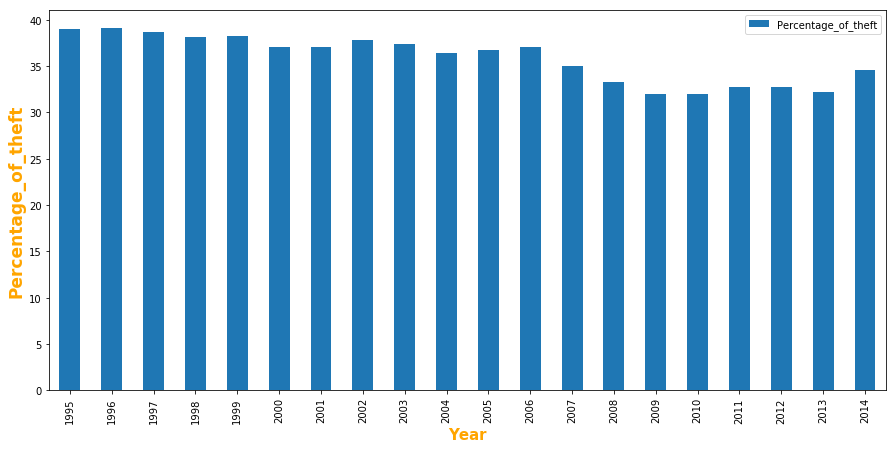

In [26]:
#Plot, the percentage of theft-related offenses, compared to the total number of offenses every year, using bar char. 

df_percentage_New.plot(kind='bar',x='Year', y='Percentage_of_theft', figsize=(15,7))
plt.xlabel('Year', fontweight='bold', color = 'orange', fontsize='15')
plt.ylabel('Percentage_of_theft', fontweight='bold', color = 'orange', fontsize='17') 

(0, 60)

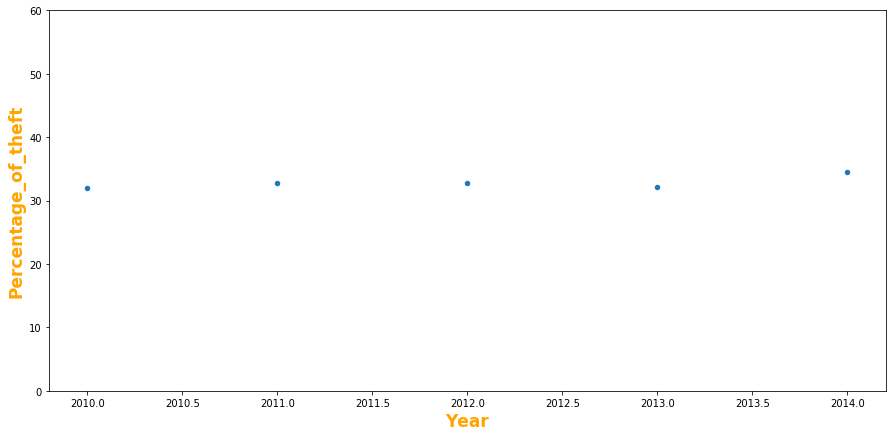

In [27]:
# Plot the last five years, the percentage of theft-related offenses, compared to the total number of offenses every year, using scatter ploy

# last five years

df_percentage_New.tail().plot(kind='scatter',x='Year', y='Percentage_of_theft', figsize=(15,7))
plt.xlabel('Year', fontweight='bold', color = 'orange', fontsize='17')
plt.ylabel('Percentage_of_theft', fontweight='bold', color = 'orange', fontsize='17')
plt.ylim(0,60)


In [28]:
# Observation: The variation in percentage for the last five years is almost linear.

#### My hypothesis#1 comes out true, as Theft and related offenses are all above 30% of the total offense.

### Hypothesis#2: A decrease of about 1% of the total offenses in the last years.

In [29]:
# For this hypothesis I will use the yearly dataframe for total offenses. And focus on the last five years.

df_total_offenses_yearly.tail()

,State_abbr,Location,Number_of_offence,Offence,Year,Month,Recorded,Resolved
15,ZZ,Total New Zealand,Z,Total Offences,2010,30 June,441960,212561
16,ZZ,Total New Zealand,Z,Total Offences,2011,30 June,416324,196819
17,ZZ,Total New Zealand,Z,Total Offences,2012,30 June,394522,187748
18,ZZ,Total New Zealand,Z,Total Offences,2013,30 June,365185,170377
19,ZZ,Total New Zealand,Z,Total Offences,2014,30 June,353564,149392


In [30]:
# Tuples of %Variation of offenses per year compare to the previous year.

list_of_variation_2=[]
for i in range(15,19):
    year_before = df_total_offenses_yearly['Recorded'][i]
    year_after = df_total_offenses_yearly['Recorded'][i+1]
    var= round((((year_before)-(year_after))/year_before)*100,2)
    tuples_var=(df_total_offenses_yearly['Year'][i+1], var)
    list_of_variation_2.append(tuples_var)
    
list_of_variation_2  

[(2011, 5.8), (2012, 5.24), (2013, 7.44), (2014, 3.18)]

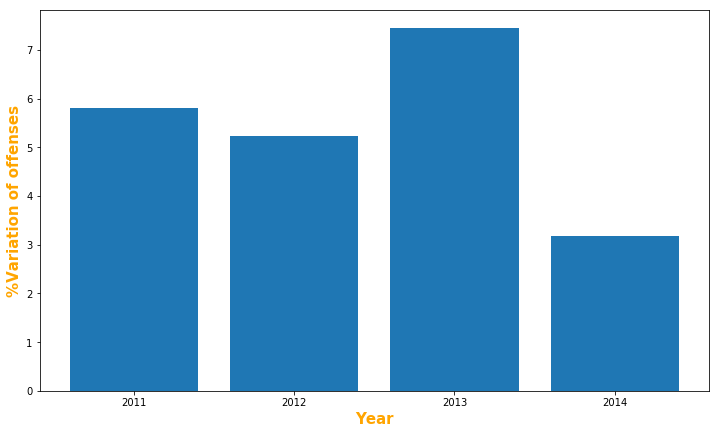

In [31]:
# Plot the percentage of reduction of the yearly total offense, using bar char

x_val = [x[0] for x in list_of_variation_2]
y_val = [x[1] for x in list_of_variation_2]

plt.figure(figsize=(12,7))
plt.bar(x_val,height =y_val , align='center' )
plt.xticks(x_val) 
plt.xlabel('Year', fontweight='bold', color = 'orange', fontsize='15')
plt.ylabel('%Variation of offenses', fontweight='bold', color = 'orange', fontsize='15')
plt.show()

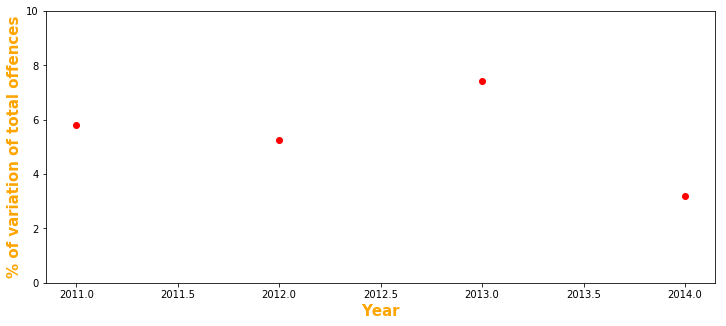

In [32]:
# Plot the percentage of reduction of the yearly total offense, using scatter plot.

#https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python

x_val = [x[0] for x in list_of_variation_2]
y_val = [x[1] for x in list_of_variation_2]

plt.figure(figsize=(12,5))
plt.plot(x_val,y_val,'or')
plt.xlabel('Year', fontweight='bold', color = 'orange', fontsize='15')
plt.ylabel('% of variation of total offences', fontweight='bold', color = 'orange', fontsize='15')
plt.ylim(0,10)
plt.show()


#### My hypothesis#2 was not verified, the percentage of reduction of the'Total number of offenses' in the past 5 years, is higher than 1% for each year.

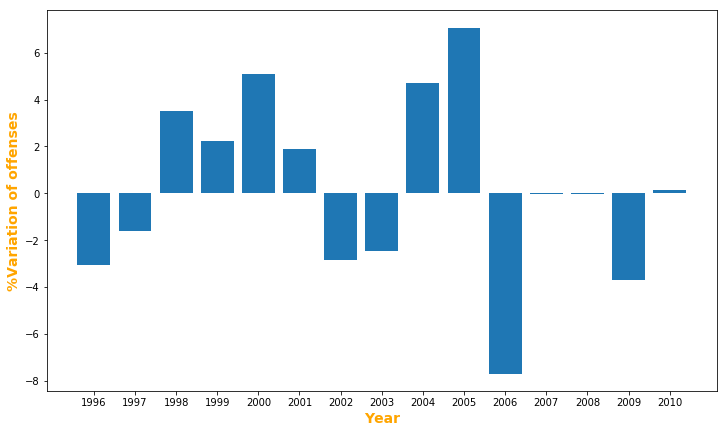

In [33]:
#Plot the first fifteen years

list_of_variation_3=[]
for i in range(0,15):
    year_before = df_total_offenses_yearly['Recorded'][i]
    year_after = df_total_offenses_yearly['Recorded'][i+1]
    var= round((((year_before)-(year_after))/year_before)*100,2)
    tuples_var=(df_total_offenses_yearly['Year'][i+1], var)
    list_of_variation_3.append(tuples_var)
    
list_of_variation_3 

x_val = [x[0] for x in list_of_variation_3]
y_val = [x[1] for x in list_of_variation_3]

plt.figure(figsize=(12,7))
plt.bar(x_val,height =y_val , align='center' )
plt.xticks(x_val) 
plt.xlabel('Year', fontweight='bold', color = 'orange', fontsize='14')
plt.ylabel('%Variation of offenses', fontweight='bold', color = 'orange', fontsize='14')
plt.show()

#### The plot of the variation of offenses per year, for the first fifteen years was not part of my hypotheses. But looking at the data, I notice some significant fluctuations in some years. And I think it is essential to show how many irregularities were found in those previous years. And that they may be some social reasons behind those fluctuations.